# <center>Graduate Project ENEL 698</center>

## This Notebook constitues of analysis of **Effectiveness of School Closures and Reopening** for reducing Coronavirus Disease 2019 (COVID-19) transmission.

## Objective and Scope
### Schools have been closed all across the globe with other layers of individual and community-based public health measures to curb the spread of COVID-19. This analysis aims to assist decision-makers with evidence to support decision-making during pandemic.

 - This analysis will address the following question:
1. This anlaysis will tell us what is the effectiveness of school closures on reducing transmission of COVID-19?
2. What impacts do the reopening of schools have on COVID-19 transmission?

#### Lets load the data to see how the world has been affected by COVID-19.

In [4]:
import requests

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
# grabbing latest worldwide data

url = "https://ncov2019.live/data/world"

r = requests.get(url)
df_list = pd.read_html(r.text)            #this parse all html tables from a webpage to alist
world_df = df_list[2]
world_df

,Name,Confirmed,Per Million,Changes Today,Percentage Day Change,Critical,Deceased,Per Million.1,Changes Today.1,Percentage Death Change,Tests,Active,Recovered,Per Million.2,Population
0,TOTAL,30940000,3980,253530,0.83%,61456,960217,124,4487,0.47%,596079210,7487521,22328495,2872,7774607744
1,★ Afghanistan,38919,995,36,0.09%,93,1437,37,0,0%,108193,4906,32576,833,39112699
2,★ Albania,12226,4249,153,1.27%,13,358,124,5,1.42%,74487,4980,6888,2394,2877103
3,★ Algeria,49623,1127,210,0.42%,31,1665,38,6,0.36%,Unknown,Unknown,34923,793,44019230
4,★ Andorra,1564,0,0,0%,4,53,0,0,0%,137457,347,1164,0,77292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,★ Montserrat,13,0,0,0%,Unknown,1,0,0,0%,373,0,12,0,4993
211,★ Falkland Islands,13,0,0,0%,Unknown,Unknown,Unknown,0,0%,2261,Unknown,13,0,3501
212,★ Saint Pierre and Miquelon,11,0,0,0%,Unknown,Unknown,Unknown,0,0%,1051,Unknown,5,0,5788
213,★ Anguilla,3,0,0,0%,Unknown,Unknown,Unknown,0,0%,1020,Unknown,3,0,15032


In [23]:
# We will now sort the countries based on total confirmed cases column

world_df = world_df.sort_values("Confirmed" , ascending = False)



#Lets get top 10 affected countries

world_df.head(10)

,Name,Confirmed,Per Million,Changes Today,Percentage Day Change,Critical,Deceased,Per Million.1,Changes Today.1,Percentage Death Change,Tests,Active,Recovered,Per Million.2,Population
0,TOTAL,30940000,3980,253530,0.83%,61456,960217,124,4487,0.47%,596079210,7487521,22328495,2872,7774607744
169,★ United States,6960706,21002,34765,0.5%,14120,203695,615,528,0.26%,97008834,2542509,4214502,12716,331425744
170,★ India,5398230,3903,92755,1.75%,8944,86774,63,1149,1.34%,62454254,1011732,4299724,3109,1382937730
171,★ Brazil,4528240,21271,30806,0.68%,8318,136532,641,675,0.5%,14617980,571613,3820095,17944,212887938
172,★ Russia,1097251,7518,6065,0.56%,2300,19339,133,144,0.75%,42400000,171450,906462,6211,145948250
173,★ Peru,756412,22873,0,0%,1449,31283,946,0,0%,3640863,124334,600795,18167,33070295
174,★ Colombia,750471,14715,0,0%,863,23850,468,0,0%,3332152,105100,621521,12187,50999943
175,★ Mexico,688954,5331,4841,0.71%,2657,72803,563,624,0.86%,1565452,123959,492192,3809,129225210
142,★ South Africa,659656,11092,2029,0.31%,539,15940,268,83,0.52%,4024659,54282,589434,9912,59469412
176,★ Spain,640040,13688,0,0%,1345,30495,652,0,0%,10756835,459169,150376,3216,46758769


#### The country converter (coco) - a Python package for converting country names between different classifications schemes.¶
<a href = "https://pypi.org/project/country-converter/">For more info please click here</a>.

In [25]:
import country_converter as coco

In [26]:
# Creating a list and appending all the names from world_df column.

Names = []
for i in range(1,215):
    Names.append(world_df.iloc[i]['Name'][3:])

# Insert Total at index 0. we left that because it doesn't contain any start in it.

Names.insert(0,'TOTAL')

In [27]:
standard_names = coco.convert(names= Names, to='ISO3')
print(len(standard_names))

215


In [28]:
# Adding the ISO3 code in a new world_df['Code'] column.

world_df['Code'] = standard_names

# Removing countries of which ISO3 code is not available

world_df = world_df[world_df['Code'] != 'not found']

#### Plot total number of confirmed cases (Top 20)

[Text(0, 0.5, 'Confirmed Cases'), Text(0.5, 0, 'Countries')]

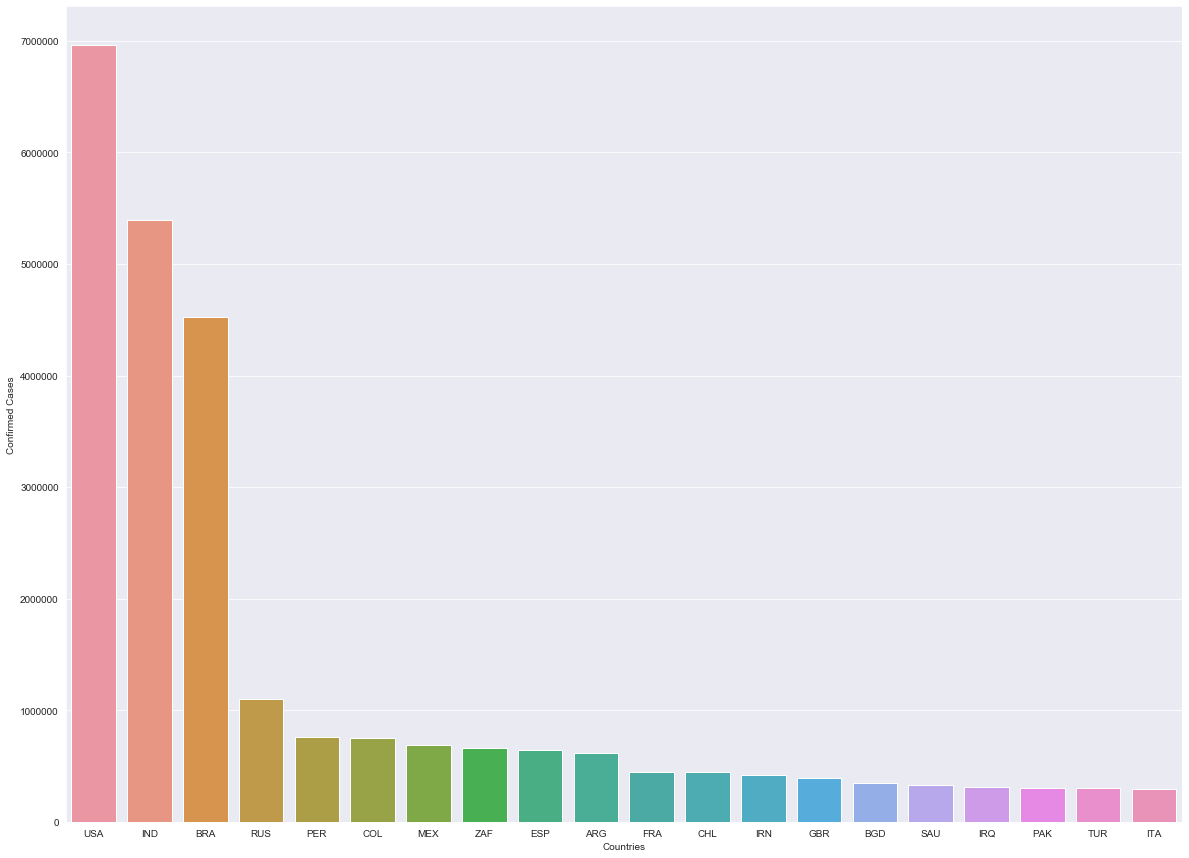

In [38]:
# Lets plot top 20 countries based on confirmed cases

plt.figure(figsize=(20,15))
sns.set_style("darkgrid")
ax = sns.barplot(x = "Code" , y = 'Confirmed', data = world_df.head(20))
ax.set(xlabel="Countries", ylabel = "Confirmed Cases")

 - USA, INDIA, and BRAZIL have been affected very severely.
 - The major reason being the failure of implementation of COVID-19 preventive measures by both Government and Citizens.

## Global Closure of School

#### The following data has been provided by **Namara** in association with **Alberta Innovates**.
<a href = "https://app.dataxch.ai/#/organizations/">For more info please click here</a>.

## Description
#### The number of children, youth and adults not attending schools or universities because of COVID-19 is soaring. Governments all around the world have closed educational institutions in an attempt to contain the global pandemic.
#### According to UNESCO monitoring, over 100 countries have implemented nationwide closures, impacting over half of worlds student population. Several other countries have implemented localized school closures and, should these closures become nationwide, millions of additional learners will experience education disruption.

In [54]:
# load the data from the local directory

school_closure_df = pd.read_csv("../covid_data/Data/GlobalSchoolClosuresCOVID-19/global-school-closures-covid-19.csv.csv")

In [55]:
school_closure_df.head()

,date,iso,country,status,note
0,2020-02-17 00:00:00+00,CHN,China,Partially open,NaN
1,2020-02-17 00:00:00+00,MNG,Mongolia,Closed due to COVID-19,NaN
2,2020-02-18 00:00:00+00,CHN,China,Partially open,NaN
3,2020-02-18 00:00:00+00,MNG,Mongolia,Closed due to COVID-19,NaN
4,2020-02-19 00:00:00+00,CHN,China,Partially open,NaN


#### Lets explore this dataset

In [57]:
school_closure_df.nunique()

date       227
iso        210
country    210
status       4
note         0
dtype: int64

In [59]:
print("This dataset contains {} number of countries.".format(school_closure_df['iso'].nunique()))

This dataset contains 210 number of countries.


#### Lets see what are the categorical variables (policies) for each country.

In [69]:
from termcolor import colored

In [74]:
print("There are {} categories in which school across the globe are divided provided this dataset.". format(school_closure_df['status'].nunique()))
print("The Categories are mentioned below:")
print(colored(school_closure_df['status'].unique(), 'green'))

There are 4 categories in which school across the globe are divided provided this dataset.
The Categories are mentioned below:
['Partially open' 'Closed due to COVID-19' 'Academic break' 'Fully open']


#### I'm creating a multindex here. It will allow us to group data based on iso codes of the respective countries.

In [98]:
print(colored(school_closure_df.set_index(['iso','country']).sort_index().head(1000),'blue'))

                               date                  status  note
iso country                                                      
ABW Aruba    2020-03-16 00:00:00+00  Closed due to COVID-19   NaN
    Aruba    2020-03-17 00:00:00+00  Closed due to COVID-19   NaN
    Aruba    2020-03-18 00:00:00+00  Closed due to COVID-19   NaN
    Aruba    2020-03-19 00:00:00+00  Closed due to COVID-19   NaN
    Aruba    2020-03-20 00:00:00+00  Closed due to COVID-19   NaN
...                             ...                     ...   ...
ALB Albania  2020-09-18 00:00:00+00              Fully open   NaN
    Albania  2020-09-19 00:00:00+00              Fully open   NaN
    Albania  2020-09-20 00:00:00+00              Fully open   NaN
    Albania  2020-09-21 00:00:00+00              Fully open   NaN
    Albania  2020-09-22 00:00:00+00              Fully open   NaN

[1000 rows x 3 columns]


[Text(0, 0.5, 'Number of Schools Impacted'), Text(0.5, 0, 'Status')]

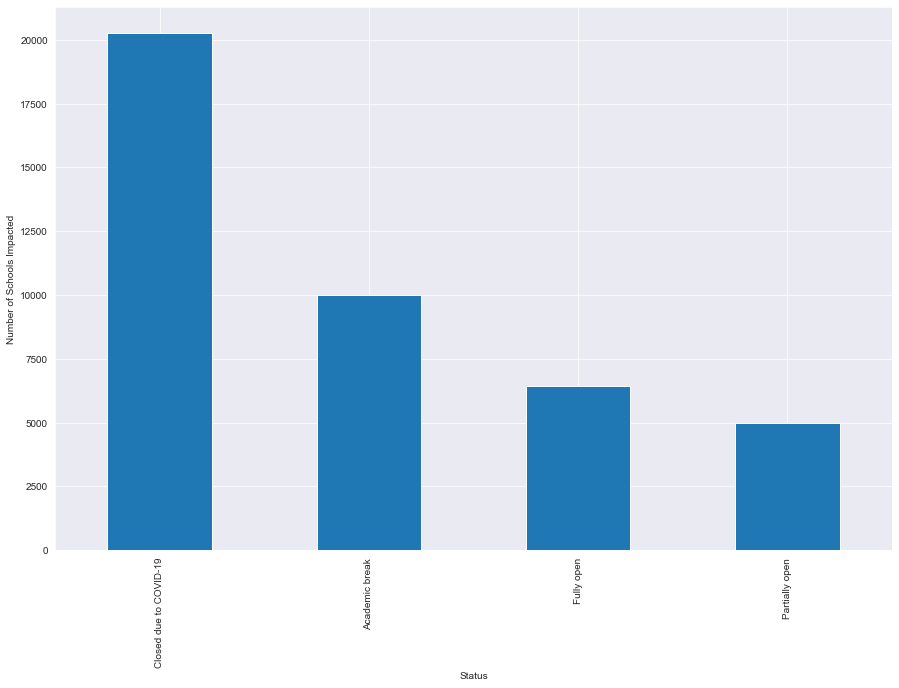

In [105]:
plt.figure(figsize = (15,10))
ax = school_closure_df['status'].value_counts().plot(kind='bar')
ax.set(xlabel="Status", ylabel = "Number of Schools Impacted")

In [121]:
canada_school_closure_df = school_closure_df[school_closure_df['iso']=='CAN']
print(colored(canada_school_closure_df,'magenta'))

                         date  iso country          status  note
423    2020-03-13 00:00:00+00  CAN  Canada  Partially open   NaN
489    2020-03-14 00:00:00+00  CAN  Canada  Partially open   NaN
557    2020-03-15 00:00:00+00  CAN  Canada  Partially open   NaN
635    2020-03-16 00:00:00+00  CAN  Canada  Partially open   NaN
761    2020-03-17 00:00:00+00  CAN  Canada  Partially open   NaN
...                       ...  ...     ...             ...   ...
40696  2020-09-26 00:00:00+00  CAN  Canada  Partially open   NaN
40906  2020-09-27 00:00:00+00  CAN  Canada  Partially open   NaN
41116  2020-09-28 00:00:00+00  CAN  Canada  Partially open   NaN
41326  2020-09-29 00:00:00+00  CAN  Canada  Partially open   NaN
41536  2020-09-30 00:00:00+00  CAN  Canada  Partially open   NaN

[202 rows x 5 columns]


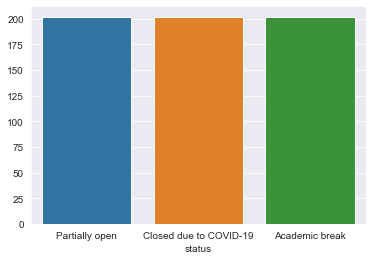

In [126]:
sns.barplot(x='status',y= canada_school_closure_df['status'].count(), data=canada_school_closure_df)

#### Lets see when the schools were closed all over Canada.

In [143]:
canada_school_closure_df[canada_school_closure_df['status']=='Closed due to COVID-19']

,date,iso,country,status,note
1680,2020-03-23 00:00:00+00,CAN,Canada,Closed due to COVID-19,NaN
1862,2020-03-24 00:00:00+00,CAN,Canada,Closed due to COVID-19,NaN
2048,2020-03-25 00:00:00+00,CAN,Canada,Closed due to COVID-19,NaN
2236,2020-03-26 00:00:00+00,CAN,Canada,Closed due to COVID-19,NaN
2426,2020-03-27 00:00:00+00,CAN,Canada,Closed due to COVID-19,NaN
...,...,...,...,...,...
21376,2020-06-26 00:00:00+00,CAN,Canada,Closed due to COVID-19,NaN
21586,2020-06-27 00:00:00+00,CAN,Canada,Closed due to COVID-19,NaN
21796,2020-06-28 00:00:00+00,CAN,Canada,Closed due to COVID-19,NaN
22006,2020-06-29 00:00:00+00,CAN,Canada,Closed due to COVID-19,NaN


In [147]:
canada_school_closure_df[canada_school_closure_df['status']=='Closed due to COVID-19'].head(10).style.apply(lambda x: ['background: yellow'
                                                                                          if (x.name == 1680) 
                                                                                          else '' for i in x], axis=1)

,date,iso,country,status,note
1680,2020-03-23 00:00:00+00,CAN,Canada,Closed due to COVID-19,nan
1862,2020-03-24 00:00:00+00,CAN,Canada,Closed due to COVID-19,nan
2048,2020-03-25 00:00:00+00,CAN,Canada,Closed due to COVID-19,nan
2236,2020-03-26 00:00:00+00,CAN,Canada,Closed due to COVID-19,nan
2426,2020-03-27 00:00:00+00,CAN,Canada,Closed due to COVID-19,nan
2618,2020-03-28 00:00:00+00,CAN,Canada,Closed due to COVID-19,nan
2810,2020-03-29 00:00:00+00,CAN,Canada,Closed due to COVID-19,nan
3005,2020-03-30 00:00:00+00,CAN,Canada,Closed due to COVID-19,nan
3203,2020-03-31 00:00:00+00,CAN,Canada,Closed due to COVID-19,nan
3402,2020-04-01 00:00:00+00,CAN,Canada,Closed due to COVID-19,nan


1. From this we can see that schools in Canada were closed in the month of March. We will use this finding to see how effective this policy was based on number of reported cases before and after March.
2. Any significant drop in the number of confirmed cases by implementing this policy will be helpful to prepare for future pandemics.

In [130]:
canada_school_closure_df[canada_school_closure_df['status']=='Partially open']

,date,iso,country,status,note
423,2020-03-13 00:00:00+00,CAN,Canada,Partially open,NaN
489,2020-03-14 00:00:00+00,CAN,Canada,Partially open,NaN
557,2020-03-15 00:00:00+00,CAN,Canada,Partially open,NaN
635,2020-03-16 00:00:00+00,CAN,Canada,Partially open,NaN
761,2020-03-17 00:00:00+00,CAN,Canada,Partially open,NaN
891,2020-03-18 00:00:00+00,CAN,Canada,Partially open,NaN
1031,2020-03-19 00:00:00+00,CAN,Canada,Partially open,NaN
1184,2020-03-20 00:00:00+00,CAN,Canada,Partially open,NaN
1348,2020-03-21 00:00:00+00,CAN,Canada,Partially open,NaN
1513,2020-03-22 00:00:00+00,CAN,Canada,Partially open,NaN


#### So here are some interesting facts that we might have overlooked in the above data

In [149]:
canada_school_closure_df[canada_school_closure_df['status']=='Partially open'].head(15).style.apply(lambda x: ['background: yellow'
                                                                                          if (x.name == 1513 or x.name == 36916)
                                                                                          else '' for i in x], axis=1)  

,date,iso,country,status,note
423,2020-03-13 00:00:00+00,CAN,Canada,Partially open,nan
489,2020-03-14 00:00:00+00,CAN,Canada,Partially open,nan
557,2020-03-15 00:00:00+00,CAN,Canada,Partially open,nan
635,2020-03-16 00:00:00+00,CAN,Canada,Partially open,nan
761,2020-03-17 00:00:00+00,CAN,Canada,Partially open,nan
891,2020-03-18 00:00:00+00,CAN,Canada,Partially open,nan
1031,2020-03-19 00:00:00+00,CAN,Canada,Partially open,nan
1184,2020-03-20 00:00:00+00,CAN,Canada,Partially open,nan
1348,2020-03-21 00:00:00+00,CAN,Canada,Partially open,nan
1513,2020-03-22 00:00:00+00,CAN,Canada,Partially open,nan


1. Here we can see that schools were partially open till March.
2. After that canadian government implemented school and university closure.
3. University of Calgary itself closed its all operation in the month of the March.
4. This helped Canadian government contain the spread of COVID-19.
5. The government with many public health measures decided to reopen school in September. This includes mandatory masaking, physical distancing, enhanced cleaning, daily symptom screening. If a case is confirmed, contact tracers and public health officals will be deployed  to identify potential exposure and limit spread.

#### Lets see answer to the two questions based on the data discovered above.
1. Effectiveness of school closures on reducing transmission of COVID-19?

In [160]:
canada_covid_df = pd.read_csv('../covid_data/Data/Covid-19/covid19.csv')

In [161]:
canada_covid_df.head(10)

,pruid,prname,prnameFR,date,numconf,numprob,numdeaths,numtotal,numtested,numrecover,...,percentdeath,numtestedtoday,numrecoveredtoday,percentactive,numactive,rateactive,numtotal_last14,ratetotal_last14,numdeaths_last14,ratedeaths_last14
0,35,Ontario,Ontario,31-01-2020,3,0,0.0,3,NaN,NaN,...,0.0,NaN,NaN,100.0,3.0,0.02,NaN,NaN,NaN,NaN
1,59,British Columbia,Colombie-Britannique,31-01-2020,1,0,0.0,1,NaN,NaN,...,0.0,NaN,NaN,100.0,1.0,0.02,NaN,NaN,NaN,NaN
2,1,Canada,Canada,31-01-2020,4,0,0.0,4,NaN,NaN,...,0.0,NaN,NaN,100.0,4.0,0.01,NaN,NaN,NaN,NaN
3,35,Ontario,Ontario,08-02-2020,3,0,0.0,3,NaN,NaN,...,0.0,NaN,NaN,100.0,3.0,0.02,NaN,NaN,NaN,NaN
4,59,British Columbia,Colombie-Britannique,08-02-2020,4,0,0.0,4,NaN,NaN,...,0.0,NaN,NaN,100.0,4.0,0.08,NaN,NaN,NaN,NaN
5,1,Canada,Canada,08-02-2020,7,0,0.0,7,NaN,NaN,...,0.0,NaN,NaN,100.0,7.0,0.02,NaN,NaN,NaN,NaN
6,35,Ontario,Ontario,16-02-2020,3,0,0.0,3,NaN,NaN,...,0.0,NaN,NaN,100.0,3.0,0.02,NaN,NaN,NaN,NaN
7,59,British Columbia,Colombie-Britannique,16-02-2020,5,0,0.0,5,NaN,NaN,...,0.0,NaN,NaN,100.0,5.0,0.10,NaN,NaN,NaN,NaN
8,1,Canada,Canada,16-02-2020,8,0,0.0,8,NaN,NaN,...,0.0,NaN,NaN,100.0,8.0,0.02,NaN,NaN,NaN,NaN
9,35,Ontario,Ontario,21-02-2020,3,0,0.0,3,NaN,NaN,...,0.0,NaN,NaN,100.0,3.0,0.02,NaN,NaN,NaN,NaN


In [167]:
from datetime import datetime

In [194]:
#converting the date column to datetime format and extracting month from it.

canada_covid_df['date'] = pd.to_datetime(canada_covid_df['date'], infer_datetime_format=True)
canada_covid_df['Month'] = canada_covid_df['date'].dt.strftime('%b')
canada_covid_df['Month Number'] = canada_covid_df['date'].dt.month

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

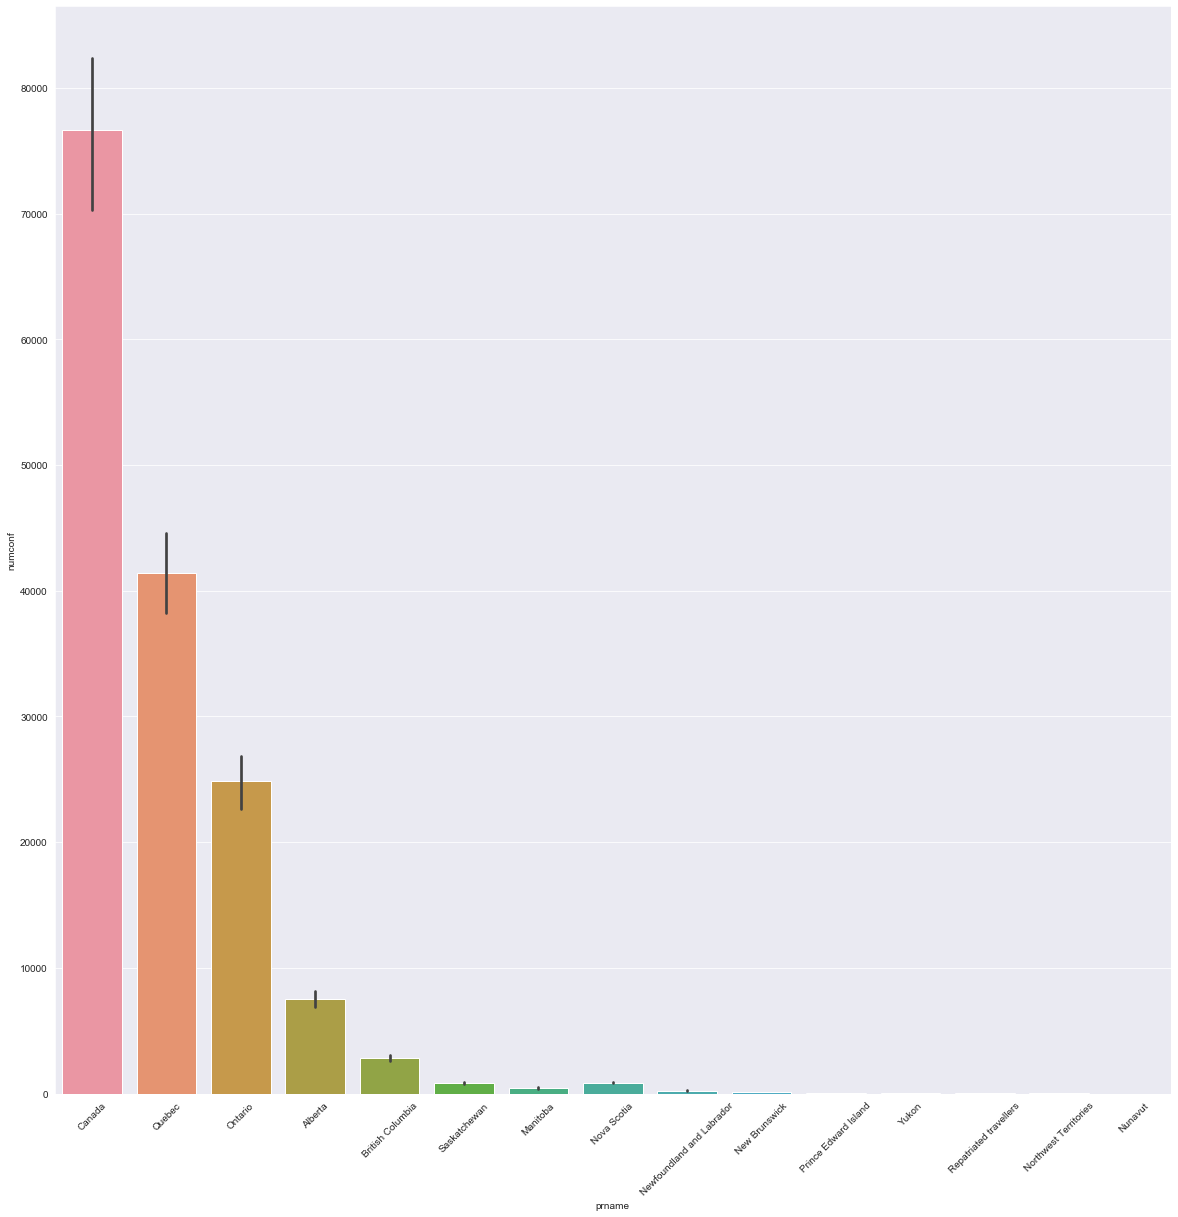

In [256]:
# lets see which province has been worst affected by covid-19

plt.figure(figsize=(20,20))
sns.barplot(x='prname',y='numconf', data=canada_covid_df.sort_values('numconf',ascending=False))
plt.xticks(rotation = 45)

 - As we can see Ontario, Quebec and Alberta have been affected more in comparison to other province.

In [273]:
canada_covid_df = canada_covid_df[canada_covid_df['pruid'] != 1]

In [283]:
#grouping the data based on month to get total num of active cases, num of confirmed cases by month.

grouped = canada_covid_df.groupby('Month Number').sum()
grouped

,pruid,numconf,numprob,numdeaths,numtotal,numtested,numrecover,percentrecover,ratetested,numtoday,...,percentdeath,numtestedtoday,numrecoveredtoday,percentactive,numactive,rateactive,numtotal_last14,ratetotal_last14,numdeaths_last14,ratedeaths_last14
Month Number,,,,,,,,,,,,,,,,,,,,,
1,94,4,0,0.0,4,0.0,0.0,0.00,0.0,4,...,0.00,0.0,0.0,200.00,4.0,0.04,0.0,0.00,0.0,0.00
2,752,85,0,0.0,85,0.0,0.0,0.00,0.0,11,...,0.00,0.0,0.0,1600.00,85.0,1.22,0.0,0.00,0.0,0.00
3,13249,50358,1655,580.0,52013,2132606.0,3833.0,686.82,878175.0,8515,...,120.30,241214.0,1254.0,24992.87,47600.0,1193.98,40827.0,969.68,435.0,6.57
4,17610,915192,412,39490.0,915602,15041059.0,226779.0,12628.40,5979141.0,44687,...,586.76,565311.0,24357.0,23684.76,649060.0,11120.81,547037.0,8812.83,30518.0,366.01
5,18197,2327883,341,170408.0,2328224,38768195.0,1146246.0,32015.86,11955583.0,37712,...,1035.85,859306.0,27481.0,5448.06,1011336.0,12685.37,591303.0,7324.75,60065.0,690.36
6,17610,2969578,330,243829.0,2966043,66304217.0,1795740.0,34967.92,17910666.0,13257,...,1129.18,1104322.0,18702.0,2903.29,926479.0,10913.93,240345.0,2667.96,27183.0,302.14
7,18197,3402199,367,272939.0,3402566,105364050.0,2608538.0,36379.41,26155620.0,12108,...,1139.65,1280205.0,33633.0,2780.92,521089.0,6842.93,157131.0,2582.58,6095.0,72.74
8,18197,3794801,177,279940.0,3794978,148398825.0,3350930.0,36493.76,36044183.0,12636,...,1038.86,1454034.0,12991.0,2767.61,164108.0,3314.17,175285.0,3692.10,2777.0,53.04
9,11153,2570001,16,174134.0,2570001,114242526.0,2261517.0,22620.69,27693228.0,13826,...,586.63,1049755.0,9969.0,1492.66,134350.0,2524.67,156405.0,2848.64,1249.0,22.25


In [287]:
#After grouping the grouping variable becomes the index so making it a label again for visualization

grouped['Month Number'] = grouped.index
grouped

Text(0, 0.5, 'Number of Active Cases')

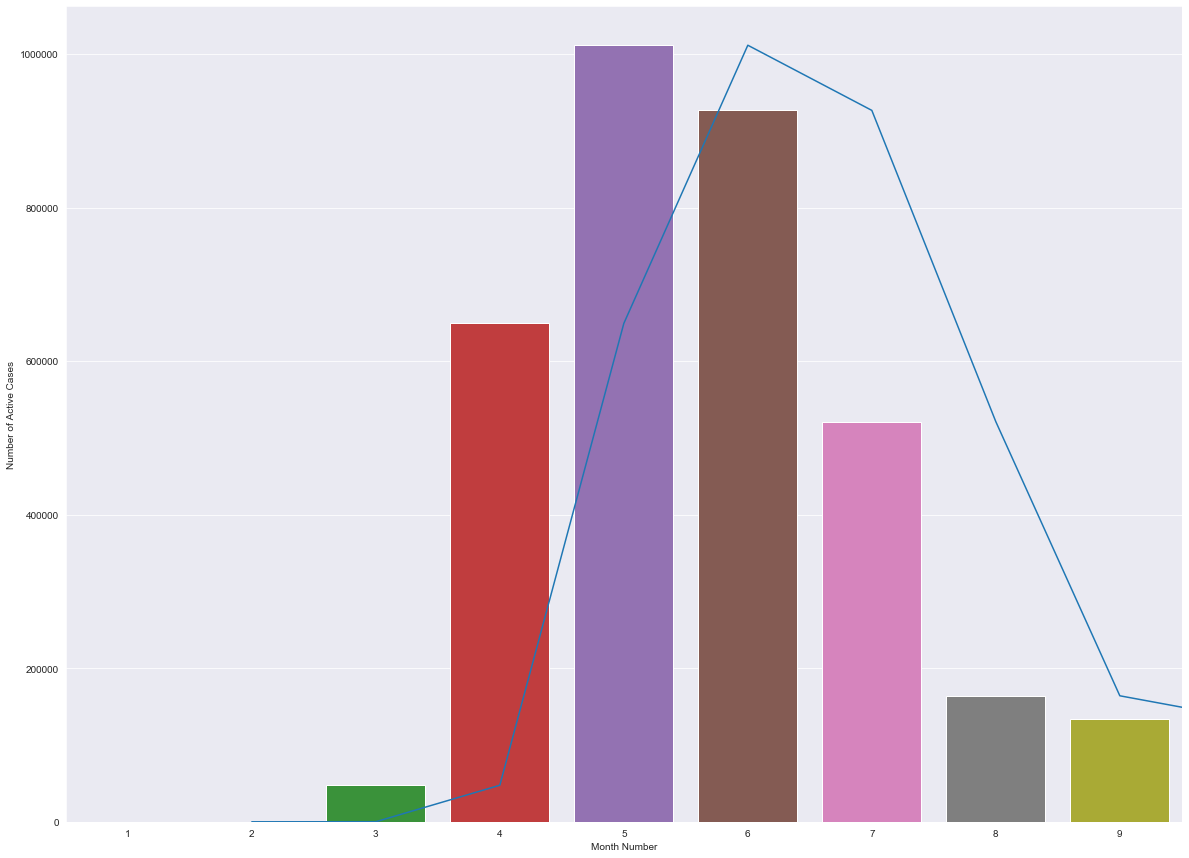

In [302]:
#plotting the grouped data for visualization.

plt.figure(figsize = (20,15))
sns.lineplot(x = 'Month Number' , y = 'numactive', data = grouped)
sns.barplot(x = 'Month Number' , y = 'numactive', data = grouped)
plt.ylabel("Number of Active Cases")

 - Here we can see maximum number of active cases were reported in the month <font color = 'red'>**May**</font>.
 - After that we can see a decline in number of active cases. Which indicates the <font color = 'green'>**effectiveness of school closing** </font>along with other social distancing measures.
 - There is a percentage drop of <font color ='green'>**~86%**</font> in number of active cases from the Month of May to September.

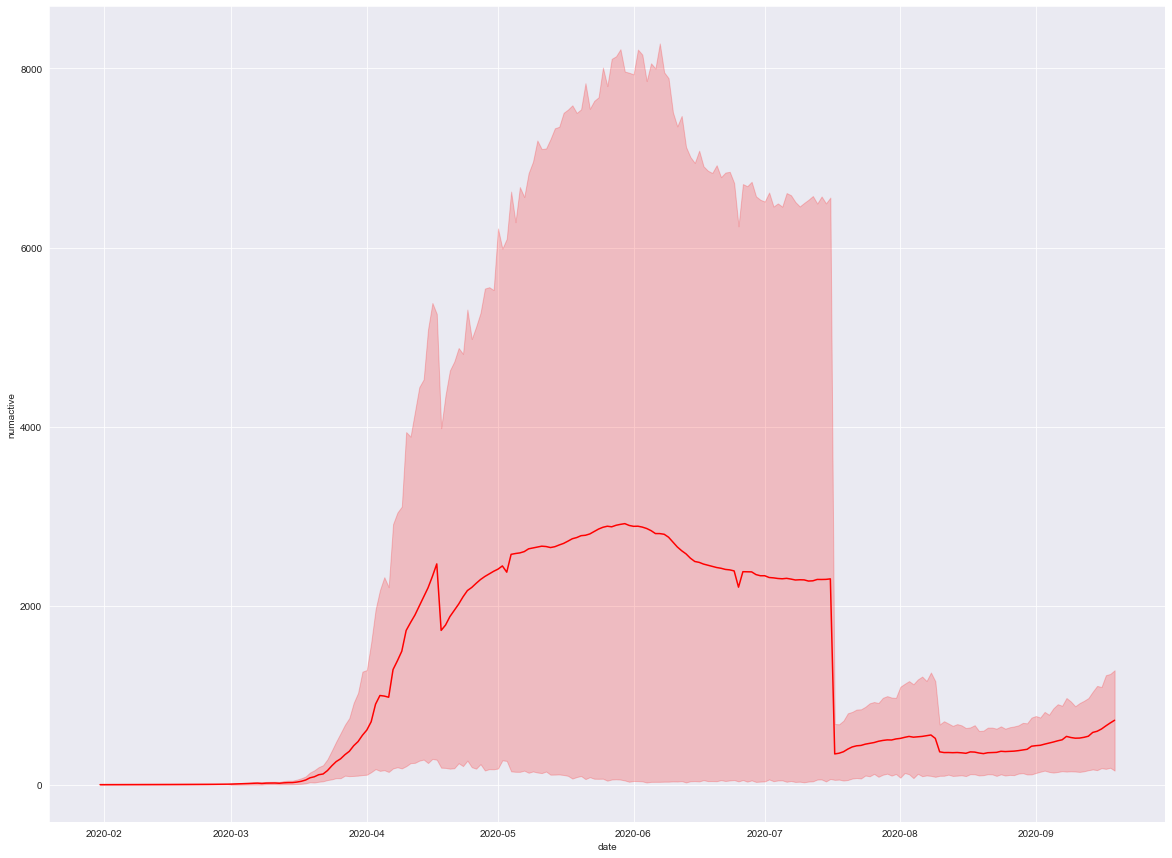

In [333]:
# New Cases by Date
plt.figure(figsize=(20,15))
sns.lineplot(y = 'numactive', x = 'date', data = canada_covid_df, color = 'red')

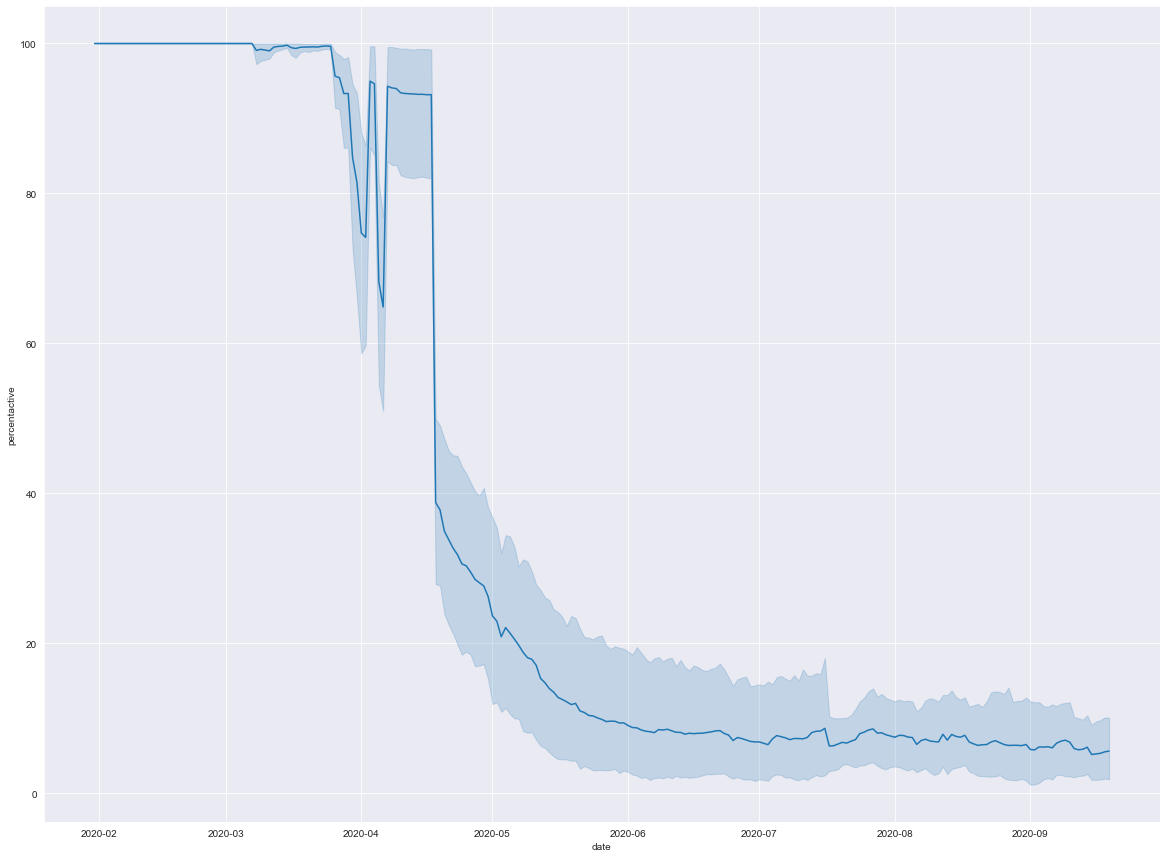

In [332]:
# Rate of new cases by previous date

plt.figure(figsize=(20,15))
sns.lineplot(y = 'percentactive', x = 'date', data = canada_covid_df)

#### Total Confirmed cases (log-scale)

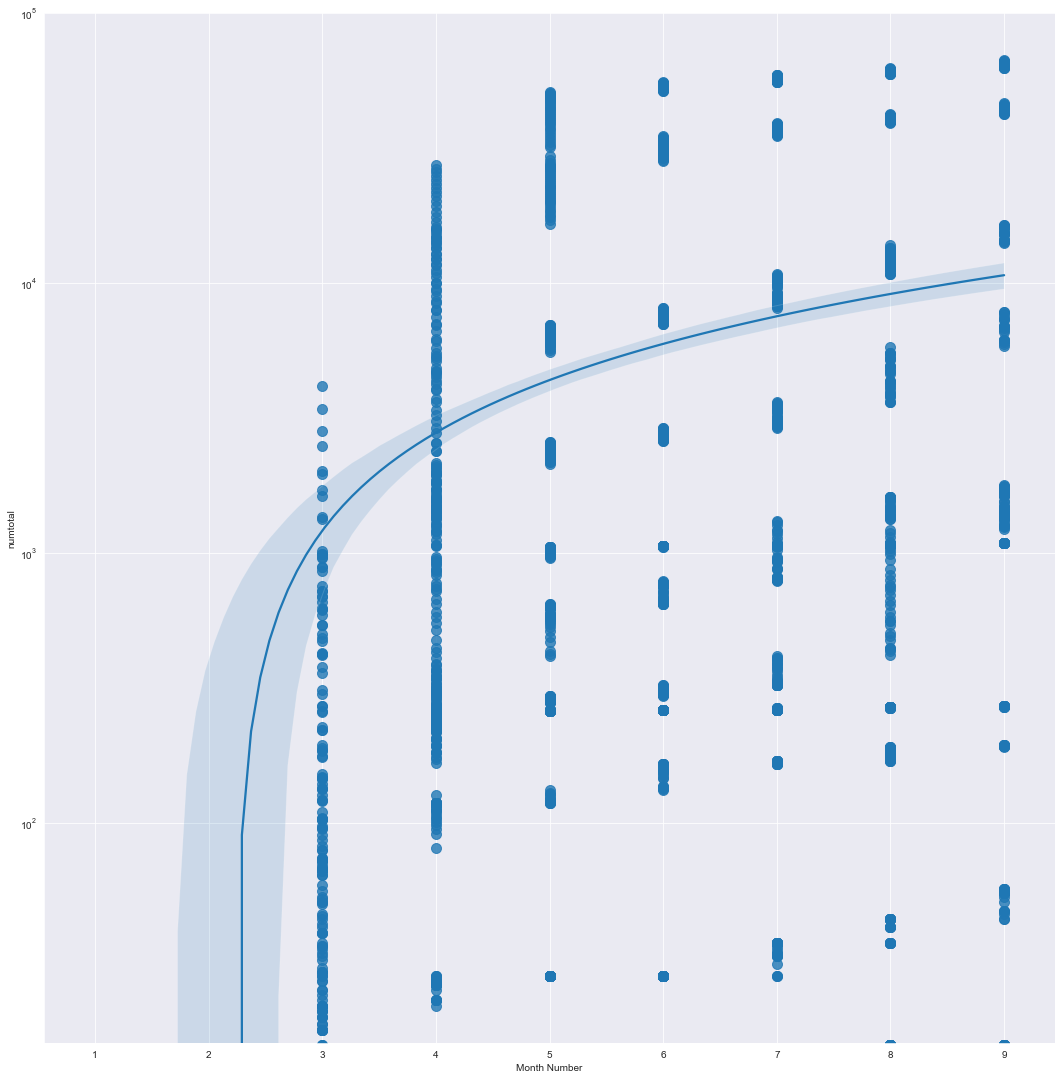

In [341]:
# Total Confirmed cases log scale

grid = sns.lmplot('Month Number', 'numtotal', canada_covid_df, height=15, truncate=True, scatter_kws={"s": 100})
grid.set(yscale="log")

 - why log scale graph?
 - Logarithmic graph can show the **trend of COVID-19 much earlier** because of the way the scale has been compressed. This graph helps us to understand the <font color='green'>**trend of flatten the curve**</font>.
 - We can see that **closing of school** along with other measures have helped **CANADA** to curb the spread of virus, especially after <font color = 'red'> **May**</font>.
 - It also helped **CANADA** to flatten the <font color = 'red'>COVID-19 curve</font>.

In [342]:
canada_covid_df

,pruid,prname,prnameFR,date,numconf,numprob,numdeaths,numtotal,numtested,numrecover,...,numrecoveredtoday,percentactive,numactive,rateactive,numtotal_last14,ratetotal_last14,numdeaths_last14,ratedeaths_last14,Month,Month Number
0,35,Ontario,Ontario,2020-01-31,3,0,0.0,3,NaN,NaN,...,NaN,100.00,3.0,0.02,NaN,NaN,NaN,NaN,Jan,1
1,59,British Columbia,Colombie-Britannique,2020-01-31,1,0,0.0,1,NaN,NaN,...,NaN,100.00,1.0,0.02,NaN,NaN,NaN,NaN,Jan,1
25,59,British Columbia,Colombie-Britannique,2020-02-29,7,0,0.0,7,NaN,NaN,...,NaN,100.00,7.0,0.14,NaN,NaN,NaN,NaN,Feb,2
24,35,Ontario,Ontario,2020-02-29,8,0,0.0,8,NaN,NaN,...,NaN,100.00,8.0,0.05,NaN,NaN,NaN,NaN,Feb,2
21,35,Ontario,Ontario,2020-02-27,6,0,0.0,6,NaN,NaN,...,NaN,100.00,6.0,0.04,NaN,NaN,NaN,NaN,Feb,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2760,46,Manitoba,Manitoba,2020-09-07,1338,0,16.0,1338,137809.0,910.0,...,12.0,30.79,412.0,30.08,345.0,25.19,4.0,0.29,Sep,9
2759,47,Saskatchewan,Saskatchewan,2020-09-07,1662,0,24.0,1662,127480.0,1580.0,...,1.0,3.49,58.0,4.94,60.0,5.11,2.0,0.17,Sep,9
2758,48,Alberta,Alberta,2020-09-07,14474,0,242.0,14474,816374.0,12799.0,...,0.0,9.90,1433.0,32.78,1468.0,33.58,8.0,0.18,Sep,9
2757,59,British Columbia,Colombie-Britannique,2020-09-07,6162,0,211.0,6162,333716.0,4706.0,...,0.0,20.20,1245.0,24.55,978.0,19.28,8.0,0.16,Sep,9


#### One question still remains is that how effective the closing of the school is all alone?
1. For this we will analyze data based on age groups.
2. Comparison of students enrolled in 2020 to 2019.

#### We will use data provided by Alberta Innovates
1. Lets load the data which is present in Data/covid19 folder and clean it.

In [515]:
canada_age_gender_df = pd.read_csv('../covid_data/Data/Covid-19/public-covid-19-cases-canada.csv.csv')

In [518]:
canada_age_gender_df.head(10)

,case_id,provincial_case_id,age,sex,health_region,province,country,date_report,report_week,has_travel_history,locally_acquired,case_source
0,NaN,1,50-59,Male,Toronto,Ontario,Canada,2020-01-25 00:00:00+00,2020-01-19 00:00:00+00,t,NaN,(1) https://news.ontario.ca/mohltc/en/2020/01/...
1,NaN,2,50-59,Female,Toronto,Ontario,Canada,2020-01-27 00:00:00+00,2020-01-26 00:00:00+00,t,NaN,(1) https://news.ontario.ca/mohltc/en/2020/01/...
2,NaN,1,40-49,Male,Not Reported,BC,Canada,2020-01-28 00:00:00+00,2020-01-26 00:00:00+00,t,NaN,https://news.gov.bc.ca/releases/2020HLTH0015-0...
3,NaN,3,20-29,Female,Middlesex-London,Ontario,Canada,2020-01-31 00:00:00+00,2020-01-26 00:00:00+00,t,NaN,(1) https://news.ontario.ca/mohltc/en/2020/01/...
4,NaN,2,50-59,Female,Vancouver Coastal,BC,Canada,2020-02-04 00:00:00+00,2020-02-02 00:00:00+00,f,Close Contact,https://news.gov.bc.ca/releases/2020HLTH0023-0...
5,NaN,3,30-39,Male,Not Reported,BC,Canada,2020-02-06 00:00:00+00,2020-02-02 00:00:00+00,t,NaN,https://news.gov.bc.ca/releases/2020HLTH0025-0...
6,NaN,4,30-39,Female,Not Reported,BC,Canada,2020-02-06 00:00:00+00,2020-02-02 00:00:00+00,t,NaN,https://news.gov.bc.ca/releases/2020HLTH0025-0...
7,NaN,5,30-39,Female,Interior,BC,Canada,2020-02-14 00:00:00+00,2020-02-09 00:00:00+00,t,NaN,(1) https://news.gov.bc.ca/releases/2020HLTH00...
8,NaN,6,30-39,Female,Fraser,BC,Canada,2020-02-20 00:00:00+00,2020-02-16 00:00:00+00,t,NaN,(1) https://news.gov.bc.ca/releases/2020HLTH00...
9,NaN,4,20-29,Female,Toronto,Ontario,Canada,2020-02-23 00:00:00+00,2020-02-23 00:00:00+00,t,NaN,(1) https://news.ontario.ca/mohltc/en/2020/02/...


In [519]:
canada_age_gender_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133347 entries, 0 to 133346
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   case_id             0 non-null       float64
 1   provincial_case_id  133347 non-null  int64  
 2   age                 133347 non-null  object 
 3   sex                 133347 non-null  object 
 4   health_region       133347 non-null  object 
 5   province            133347 non-null  object 
 6   country             133347 non-null  object 
 7   date_report         133347 non-null  object 
 8   report_week         133347 non-null  object 
 9   has_travel_history  1762 non-null    object 
 10  locally_acquired    1099 non-null    object 
 11  case_source         133347 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 12.2+ MB


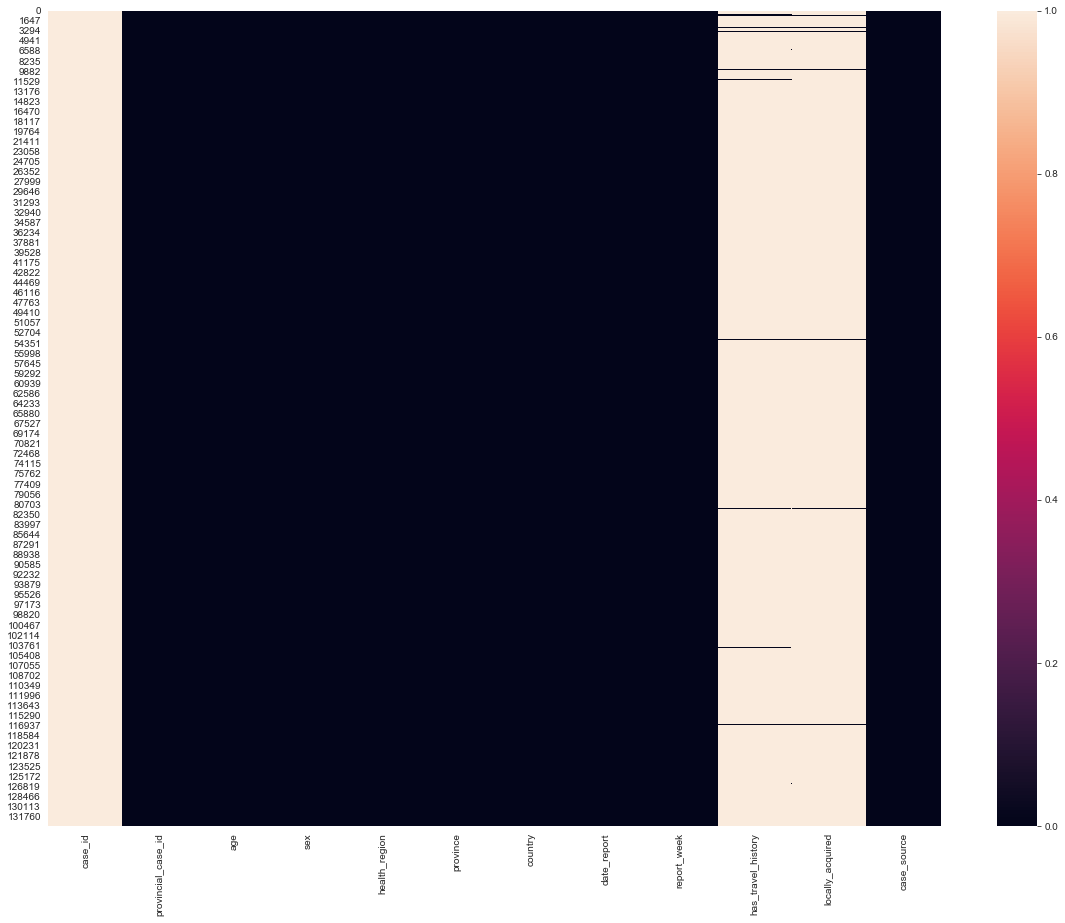

In [520]:
plt.figure(figsize=(20,15))
sns.heatmap(canada_age_gender_df.isnull())

 - Columns case_id, has_travel_history, locally_acquired have null values.
1. case_id is of no use for us, as we are focusing on answering age based question.
2. has_travel_history might help us in differentiating the case from locally_acquired cases.

In [521]:
# Dropping case_id

canada_age_gender_df.drop('case_id',axis=1,inplace=True)

In [522]:
canada_age_gender_df['has_travel_history']

0           t
1           t
2           t
3           t
4           f
         ... 
133342    NaN
133343    NaN
133344    NaN
133345    NaN
133346    NaN
Name: has_travel_history, Length: 133347, dtype: object

In [523]:
canada_age_gender_df['has_travel_history'].unique()

array(['t', 'f', nan], dtype=object)

In [524]:
canada_age_gender_df['has_travel_history'] = (canada_age_gender_df['has_travel_history'].apply(lambda x : 1 if (x == 't')
                                                            else 0))

 - We changed the column based on following:
 1. All the 't' which meant that the patient had a travel history are converted to 1.
 2. All the 'f' which meant that the patient do not have a travel history are converted to 0.

In [525]:
canada_age_gender_df['locally_acquired'].unique()

array([nan, 'Close Contact', 'Community', 'Close contact',
       'close contact', '1'], dtype=object)

In [526]:
canada_age_gender_df[canada_age_gender_df['locally_acquired']=='1']

,provincial_case_id,age,sex,health_region,province,country,date_report,report_week,has_travel_history,locally_acquired,case_source
125229,42712,0-17,Female,Simcoe Muskoka,Ontario,Canada,2020-08-19 00:00:00+00,2020-08-16 00:00:00+00,0,1,https://www.simcoemuskokahealthstats.org/topic...


In [527]:
canada_age_gender_df[canada_age_gender_df['locally_acquired']=='Community']

,provincial_case_id,age,sex,health_region,province,country,date_report,report_week,has_travel_history,locally_acquired,case_source
45,21,50-59,Female,Fraser,BC,Canada,2020-03-05 00:00:00+00,2020-03-01 00:00:00+00,0,Community,https://news.gov.bc.ca/releases/2020HLTH0062-0...
92,38,90-99,Male,Fraser,BC,Canada,2020-03-10 00:00:00+00,2020-03-08 00:00:00+00,0,Community,https://news.gov.bc.ca/releases/2020HLTH0072-0...
93,39,40-49,Male,Fraser,BC,Canada,2020-03-10 00:00:00+00,2020-03-08 00:00:00+00,0,Community,https://news.gov.bc.ca/releases/2020HLTH0072-0...
94,37,50-59,Male,Sudbury,Ontario,Canada,2020-03-10 00:00:00+00,2020-03-08 00:00:00+00,0,Community,https://www.phsd.ca/news/first-case-of-covid-1...
109,41,60-69,Female,Fraser,BC,Canada,2020-03-11 00:00:00+00,2020-03-08 00:00:00+00,0,Community,https://news.gov.bc.ca/releases/2020HLTH0074-0...
...,...,...,...,...,...,...,...,...,...,...,...
123039,42173,35-44,Male,Simcoe Muskoka,Ontario,Canada,2020-08-13 00:00:00+00,2020-08-09 00:00:00+00,0,Community,http://www.simcoemuskokahealthstats.org/topics...
125676,42852,50-59,Female,Sudbury,Ontario,Canada,2020-08-19 00:00:00+00,2020-08-16 00:00:00+00,0,Community,https://www.phsd.ca/health-topics-programs/dis...
126414,43073,40-49,Male,Sudbury,Ontario,Canada,2020-08-22 00:00:00+00,2020-08-16 00:00:00+00,0,Community,https://www.phsd.ca/news/public-service-announ...
127740,43379,35-44,Female,Simcoe Muskoka,Ontario,Canada,2020-08-25 00:00:00+00,2020-08-23 00:00:00+00,0,Community,https://www.simcoemuskokahealthstats.org/topic...


In [528]:
canada_age_gender_df['locally_acquired']

0                   NaN
1                   NaN
2                   NaN
3                   NaN
4         Close Contact
              ...      
133342              NaN
133343              NaN
133344              NaN
133345              NaN
133346              NaN
Name: locally_acquired, Length: 133347, dtype: object

In [529]:
canada_age_gender_df['locally_acquired'] = canada_age_gender_df['locally_acquired'].apply(lambda x: 0 if pd.isnull(x) else 1)

In [530]:
canada_age_gender_df.drop('case_source', inplace = True, axis = 1)

In [531]:
canada_age_gender_df

,provincial_case_id,age,sex,health_region,province,country,date_report,report_week,has_travel_history,locally_acquired
0,1,50-59,Male,Toronto,Ontario,Canada,2020-01-25 00:00:00+00,2020-01-19 00:00:00+00,1,0
1,2,50-59,Female,Toronto,Ontario,Canada,2020-01-27 00:00:00+00,2020-01-26 00:00:00+00,1,0
2,1,40-49,Male,Not Reported,BC,Canada,2020-01-28 00:00:00+00,2020-01-26 00:00:00+00,1,0
3,3,20-29,Female,Middlesex-London,Ontario,Canada,2020-01-31 00:00:00+00,2020-01-26 00:00:00+00,1,0
4,2,50-59,Female,Vancouver Coastal,BC,Canada,2020-02-04 00:00:00+00,2020-02-02 00:00:00+00,0,1
...,...,...,...,...,...,...,...,...,...,...
133342,44851,Not Reported,Not Reported,York,Ontario,Canada,2020-09-05 00:00:00+00,2020-08-30 00:00:00+00,0,0
133343,44852,Not Reported,Not Reported,York,Ontario,Canada,2020-09-05 00:00:00+00,2020-08-30 00:00:00+00,0,0
133344,44853,Not Reported,Not Reported,York,Ontario,Canada,2020-09-05 00:00:00+00,2020-08-30 00:00:00+00,0,0
133345,44854,Not Reported,Not Reported,York,Ontario,Canada,2020-09-05 00:00:00+00,2020-08-30 00:00:00+00,0,0


In [532]:
canada_age_gender_df['age'].unique()

array(['50-59', '40-49', '20-29', '30-39', '60-69', '80-89', '70-79',
       'Not Reported', '10-19', '90-99', '<18', '<1', '2', '61', '50',
       '<10', '<20', '20-39', '60-79', '40-59', '100-109', '<19', '>90',
       '65-79', '18-34', '45-64', '35-44', '80+', '0-17', '90+', '45-65',
       '>80', '30-49', '0-9', '18-24', '0-19'], dtype=object)

In [533]:
canada_age_gender_df = canada_age_gender_df[canada_age_gender_df['age']!='Not Reported']

In [534]:
canada_age_gender_df['age'].unique()

array(['50-59', '40-49', '20-29', '30-39', '60-69', '80-89', '70-79',
       '10-19', '90-99', '<18', '<1', '2', '61', '50', '<10', '<20',
       '20-39', '60-79', '40-59', '100-109', '<19', '>90', '65-79',
       '18-34', '45-64', '35-44', '80+', '0-17', '90+', '45-65', '>80',
       '30-49', '0-9', '18-24', '0-19'], dtype=object)

In [535]:
canada_age_gender_df['sex'].unique()

array(['Male', 'Female', 'Not Reported'], dtype=object)

In [536]:
canada_age_gender_df = canada_age_gender_df[canada_age_gender_df['sex']!='Not Reported']

In [537]:
canada_age_gender_df['sex'].unique()

array(['Male', 'Female'], dtype=object)

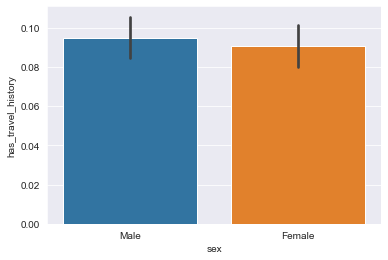

In [538]:
sns.barplot(x='sex',y='has_travel_history', data=canada_age_gender_df)

In [539]:
canada_age_gender_df[(canada_age_gender_df.sex == 'Male') & (canada_age_gender_df.has_travel_history == 1)]

,provincial_case_id,age,sex,health_region,province,country,date_report,report_week,has_travel_history,locally_acquired
0,1,50-59,Male,Toronto,Ontario,Canada,2020-01-25 00:00:00+00,2020-01-19 00:00:00+00,1,0
2,1,40-49,Male,Not Reported,BC,Canada,2020-01-28 00:00:00+00,2020-01-26 00:00:00+00,1,0
5,3,30-39,Male,Not Reported,BC,Canada,2020-02-06 00:00:00+00,2020-02-02 00:00:00+00,1,0
14,7,50-59,Male,Toronto,Ontario,Canada,2020-02-28 00:00:00+00,2020-02-23 00:00:00+00,1,0
15,8,80-89,Male,Toronto,Ontario,Canada,2020-02-28 00:00:00+00,2020-02-23 00:00:00+00,1,0
...,...,...,...,...,...,...,...,...,...,...
124787,44,40-49,Male,Prince Edward Island,PEI,Canada,2020-08-18 00:00:00+00,2020-08-16 00:00:00+00,1,0
132041,45,20-29,Male,Prince Edward Island,PEI,Canada,2020-09-03 00:00:00+00,2020-08-30 00:00:00+00,1,0
132042,46,30-39,Male,Prince Edward Island,PEI,Canada,2020-09-03 00:00:00+00,2020-08-30 00:00:00+00,1,0
132683,47,10-19,Male,Prince Edward Island,PEI,Canada,2020-09-04 00:00:00+00,2020-08-30 00:00:00+00,1,0


In [540]:
canada_age_gender_df['date_report'] = pd.to_datetime(canada_age_gender_df['date_report'], infer_datetime_format=True)

In [541]:
canada_age_gender_df.drop('report_week',inplace=True,axis=1)

In [542]:
canada_age_gender_df

,provincial_case_id,age,sex,health_region,province,country,date_report,has_travel_history,locally_acquired
0,1,50-59,Male,Toronto,Ontario,Canada,2020-01-25,1,0
1,2,50-59,Female,Toronto,Ontario,Canada,2020-01-27,1,0
2,1,40-49,Male,Not Reported,BC,Canada,2020-01-28,1,0
3,3,20-29,Female,Middlesex-London,Ontario,Canada,2020-01-31,1,0
4,2,50-59,Female,Vancouver Coastal,BC,Canada,2020-02-04,0,1
...,...,...,...,...,...,...,...,...,...
132683,47,10-19,Male,Prince Edward Island,PEI,Canada,2020-09-04,1,0
132872,44583,20-29,Male,Porcupine,Ontario,Canada,2020-09-04,1,0
132923,44634,18-34,Male,Simcoe Muskoka,Ontario,Canada,2020-09-04,0,0
132924,44635,18-34,Male,Simcoe Muskoka,Ontario,Canada,2020-09-04,0,0


In [543]:
canada_age_gender_df[canada_age_gender_df['age']=='20-29']

,provincial_case_id,age,sex,health_region,province,country,date_report,has_travel_history,locally_acquired
3,3,20-29,Female,Middlesex-London,Ontario,Canada,2020-01-31,1,0
9,4,20-29,Female,Toronto,Ontario,Canada,2020-02-23,1,0
38,14,20-29,Male,Not Reported,BC,Canada,2020-03-05,0,1
51,27,20-29,Male,Toronto,Ontario,Canada,2020-03-06,1,0
104,16,20-29,Male,Calgary,Alberta,Canada,2020-03-11,1,0
...,...,...,...,...,...,...,...,...,...
132648,6137,20-29,Female,Vancouver Coastal,BC,Canada,2020-09-04,0,0
132650,6139,20-29,Male,Vancouver Coastal,BC,Canada,2020-09-04,0,0
132651,6140,20-29,Female,Vancouver Coastal,BC,Canada,2020-09-04,0,0
132657,6146,20-29,Male,Vancouver Coastal,BC,Canada,2020-09-04,0,0


In [544]:
under20 = ['0-17','0-19','0-9','10-19','18-24','18-34','<1','<10','<18','<19','<20']

def convert_agegroup(x):
    
    if x in under20:
        return 'under20'
    else:
        return '20 and older'

In [545]:
canada_age_gender_df['age'] = canada_age_gender_df['age'].apply(lambda x : convert_agegroup(x))

In [546]:
canada_age_gender_df.head(10)

,provincial_case_id,age,sex,health_region,province,country,date_report,has_travel_history,locally_acquired
0,1,20 and older,Male,Toronto,Ontario,Canada,2020-01-25,1,0
1,2,20 and older,Female,Toronto,Ontario,Canada,2020-01-27,1,0
2,1,20 and older,Male,Not Reported,BC,Canada,2020-01-28,1,0
3,3,20 and older,Female,Middlesex-London,Ontario,Canada,2020-01-31,1,0
4,2,20 and older,Female,Vancouver Coastal,BC,Canada,2020-02-04,0,1
5,3,20 and older,Male,Not Reported,BC,Canada,2020-02-06,1,0
6,4,20 and older,Female,Not Reported,BC,Canada,2020-02-06,1,0
7,5,20 and older,Female,Interior,BC,Canada,2020-02-14,1,0
8,6,20 and older,Female,Fraser,BC,Canada,2020-02-20,1,0
9,4,20 and older,Female,Toronto,Ontario,Canada,2020-02-23,1,0


In [585]:
canada_age_gender_df['Month'] = canada_age_gender_df['date_report'].dt.strftime('%b')
canada_age_gender_df['Month Number'] = canada_age_gender_df['date_report'].dt.month

In [586]:
month_age_df = canada_age_gender_df.groupby(['Month Number','age']).size().unstack(fill_value=0)
print(month_age_df)

age           20 and older  under20
Month Number                       
1                        4        0
2                       16        0
3                      820       21
4                      463       25
5                      209       18
6                      414       47
7                      640      118
8                     2130      304
9                      220       41


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

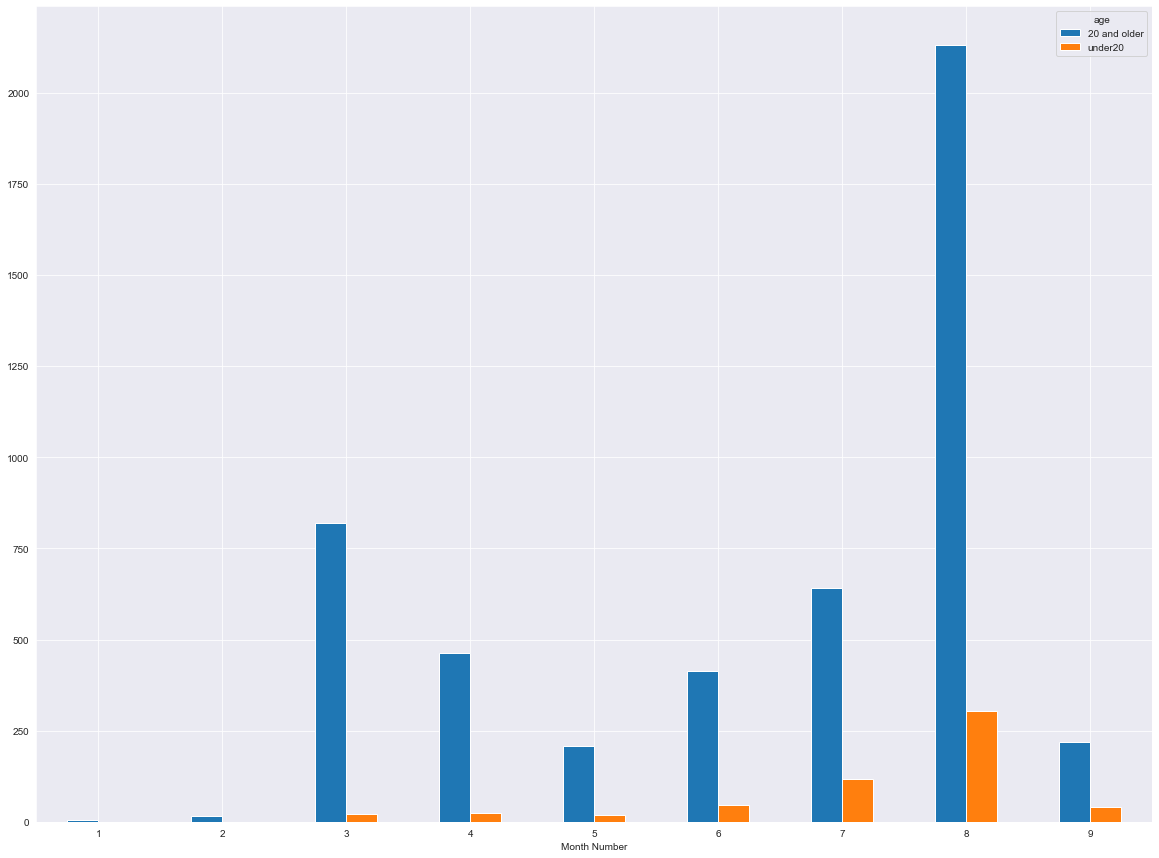

In [599]:
month_age_df.plot.bar(figsize=(20,15))
plt.xticks(rotation = 0)

 - From this graph we can see that **school closure** has helped Canadian government contain the spread of virus.
 - Recent modelling studies of COVID-19 predict that school closures alone would prevent only <font color = 'red'>**2-4%**</font> of deaths only, which is much less than other social distancing interventions. <a href = 'https://www.thelancet.com/journals/lanchi/article/PIIS2352-4642(20)30095-X/fulltext#:~:text=Recent%20modelling%20studies%20of%20COVID,than%20other%20social%20distancing%20interventions.'>Source (School closure and management practices during coronavirus outbreaks including COVID-19: a rapid systematic review)</a>.

age            20 and older  under20
province                            
Alberta                  22        0
BC                     2865      369
Manitoba                355       67
NL                        9        1
New Brunswick            17        1
Nova Scotia               6        0
Ontario                1605      135
PEI                      34        1
Quebec                    2        0
Saskatchewan              1        0


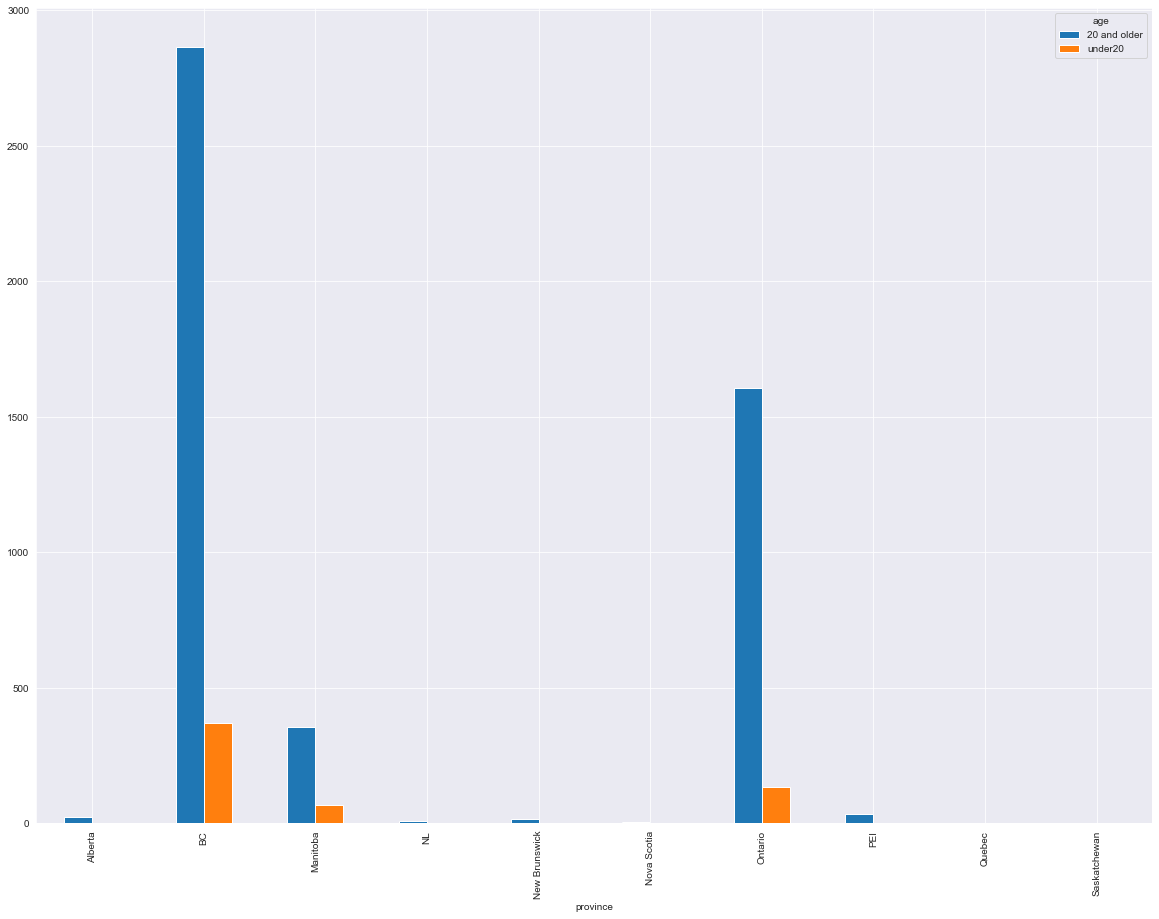

In [602]:
province_age_df = canada_age_gender_df.groupby(['province','age']).size().unstack(fill_value=0)
print(province_age_df)
province_age_df.plot.bar(figsize=(20,15))

 - We can also see how province wise this distribution is. Age group of <font color='green'>**Under20**</font> is less affected then age group of <font color='red'>**20 and above**</font>.

age     20 and older  under20
sex                          
Female          2413      272
Male            2503      302


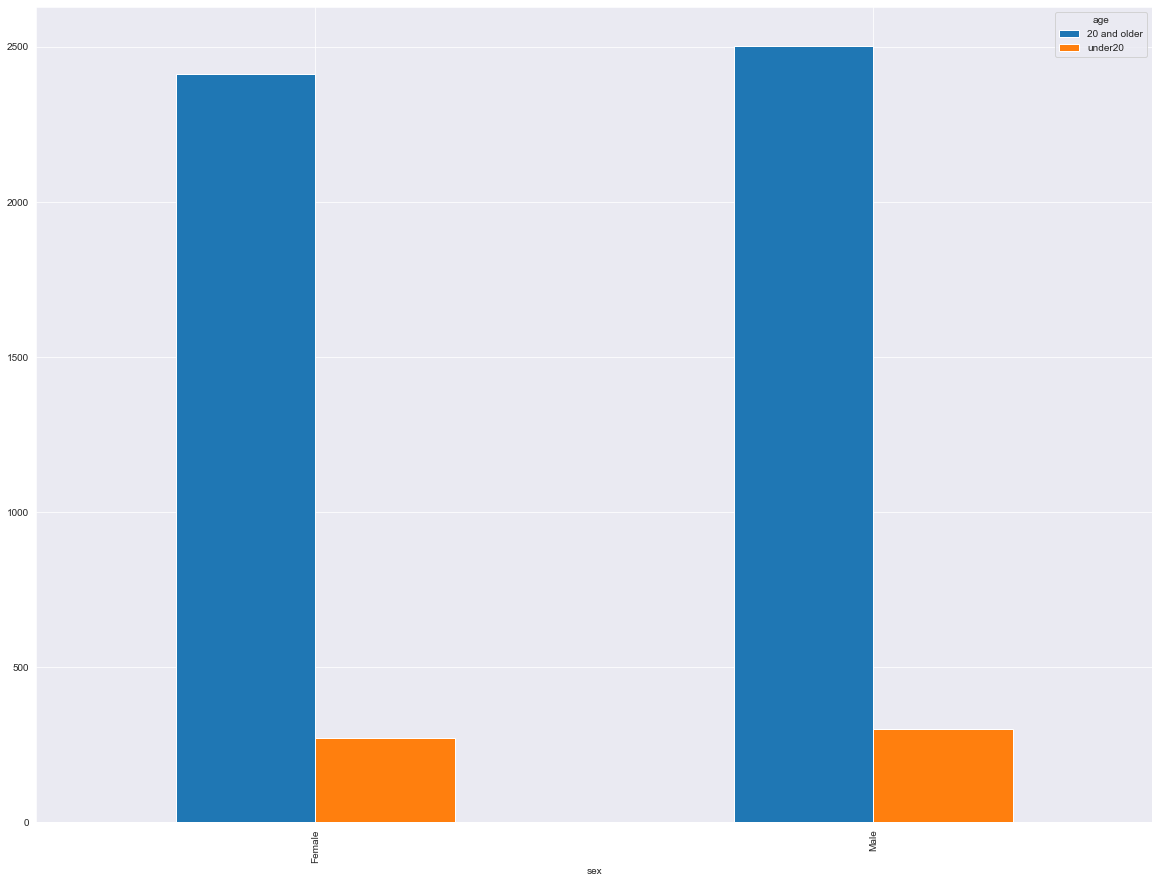

In [601]:
sex_age_df = canada_age_gender_df.groupby(['sex','age']).size().unstack(fill_value=0)
print(sex_age_df)
sex_age_df.plot.bar(figsize=(20,15))